In [391]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic', 'anagrams', 'anagrams', 'anscombe', 'anscombe', 'attention', 'attention', 'brain_networks', 'brain_networks', 'car_crashes', 'car_crashes', 'diamonds', 'diamonds', 'dots', 'dots', 'dowjones', 'dowjones', 'exercise', 'exercise', 'flights', 'flights', 'fmri', 'fmri', 'geyser', 'geyser', 'glue', 'glue', 'healthexp', 'healthexp', 'iris', 'iris', 'mpg', 'mpg', 'penguins', 'penguins', 'planets', 'planets', 'seaice', 'seaice', 'taxis', 'taxis', 'tips', 'tips', 'titanic', 'titanic', 'anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [392]:
data=sns.load_dataset('attention')
data.head()

,Unnamed: 0,subject,attention,solutions,score
0,0,1,divided,1,2.0
1,1,2,divided,1,3.0
2,2,3,divided,1,3.0
3,3,4,divided,1,5.0
4,4,5,divided,1,4.0


In [393]:
data.drop(columns=["Unnamed: 0"],inplace=True)

In [394]:
data["attention"].value_counts()

attention
divided    30
focused    30
Name: count, dtype: int64

In [395]:
data.describe()

,subject,solutions,score
count,60.000000,60.000000,60.000000
mean,10.500000,2.000000,5.958333
std,5.814943,0.823387,1.621601
min,1.000000,1.000000,2.000000
25%,5.750000,1.000000,5.000000
50%,10.500000,2.000000,6.000000
75%,15.250000,3.000000,7.000000
max,20.000000,3.000000,9.000000


In [396]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   subject    60 non-null     int64  
 1   attention  60 non-null     object 
 2   solutions  60 non-null     int64  
 3   score      60 non-null     float64
dtypes: float64(1), int64(2), object(1)
memory usage: 2.0+ KB


In [397]:
data.isnull().sum()

subject      0
attention    0
solutions    0
score        0
dtype: int64

In [398]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [399]:
data["attention"]=le.fit_transform(data["attention"])

In [400]:
data.head()

,subject,attention,solutions,score
0,1,0,1,2.0
1,2,0,1,3.0
2,3,0,1,3.0
3,4,0,1,5.0
4,5,0,1,4.0


In [401]:
data["attention"].value_counts()

attention
0    30
1    30
Name: count, dtype: int64

In [402]:
X=data.iloc[:,:-1]
y=data.iloc[:,3]


In [403]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=0)

In [404]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(xtrain,ytrain)
ypred=regression.predict(xtest)

In [405]:
print(regression.coef_)

[0.08074227 0.73834415 0.69469282]


In [406]:
print(regression.intercept_)

3.41243170598286


In [407]:
from sklearn.metrics import r2_score

In [408]:
r2_score(ytest,ypred)

0.19403216630380238

In [409]:
data["solutions"].value_counts()

solutions
1    20
2    20
3    20
Name: count, dtype: int64

In [410]:
ds=sns.load_dataset("tips")
ds.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [411]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [412]:
ds["sex"]=le.fit_transform(ds["sex"])
ds.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,No,Sun,Dinner,2
1,10.34,1.66,1,No,Sun,Dinner,3
2,21.01,3.50,1,No,Sun,Dinner,3
3,23.68,3.31,1,No,Sun,Dinner,2
4,24.59,3.61,0,No,Sun,Dinner,4


In [413]:
ds["smoker"].value_counts()

smoker
No     151
Yes     93
Name: count, dtype: int64

In [414]:
ds.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [415]:
ds[ds.duplicated()]

,total_bill,tip,sex,smoker,day,time,size
202,13.0,2.0,0,Yes,Thur,Lunch,2


In [416]:
ds=ds.drop_duplicates()

In [417]:
ds.duplicated().sum()

0

<Axes: >

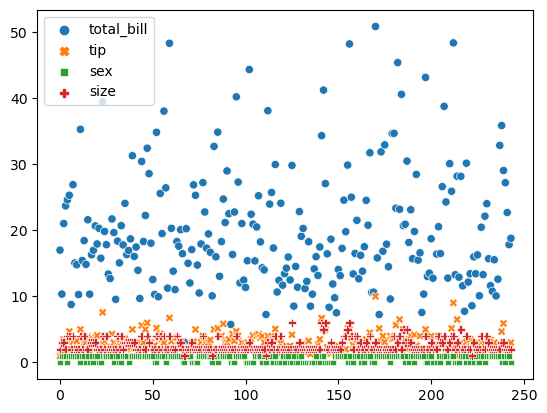

In [418]:
sns.scatterplot(ds)

In [419]:
import pandas as pd
from scipy import stats

# Read the DataFrame


# Define a threshold for Z-score (e.g., 3 standard deviations)
threshold = 3

# Find and remove outliers based on Z-score for numeric columns
numeric_cols = ds.select_dtypes(include='number').columns
for col in numeric_cols:
    z_scores = stats.zscore(ds[col])
    outlier_indices = abs(z_scores) > threshold
    ds = ds[~outlier_indices]

# Display cleaned DataFrame without outliers
print("DataFrame after removing outliers:")
print(ds)


DataFrame after removing outliers:
     total_bill   tip  sex smoker   day    time  size
0         16.99  1.01    0     No   Sun  Dinner     2
1         10.34  1.66    1     No   Sun  Dinner     3
2         21.01  3.50    1     No   Sun  Dinner     3
3         23.68  3.31    1     No   Sun  Dinner     2
4         24.59  3.61    0     No   Sun  Dinner     4
..          ...   ...  ...    ...   ...     ...   ...
239       29.03  5.92    1     No   Sat  Dinner     3
240       27.18  2.00    0    Yes   Sat  Dinner     2
241       22.67  2.00    1    Yes   Sat  Dinner     2
242       17.82  1.75    1     No   Sat  Dinner     2
243       18.78  3.00    0     No  Thur  Dinner     2

[235 rows x 7 columns]


<Axes: >

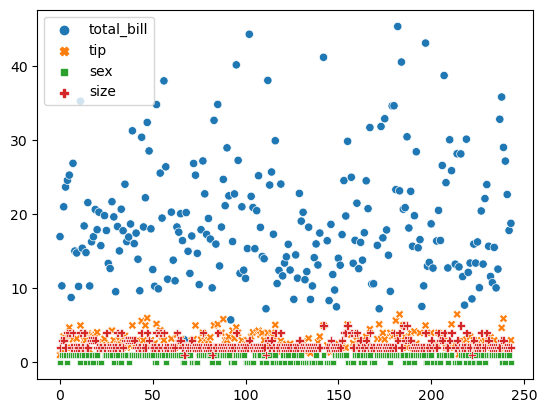

In [420]:
sns.scatterplot(ds)

In [421]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Index: 235 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  235 non-null    float64 
 1   tip         235 non-null    float64 
 2   sex         235 non-null    int64   
 3   smoker      235 non-null    category
 4   day         235 non-null    category
 5   time        235 non-null    category
 6   size        235 non-null    int64   
dtypes: category(3), float64(2), int64(2)
memory usage: 10.3 KB


In [422]:
data=sns.load_dataset('iris')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [423]:
data.index

RangeIndex(start=0, stop=150, step=1)

In [424]:
len(data.index)

150

In [425]:
data.shape

(150, 5)

In [426]:
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [427]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [428]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


/Users/sharafunneesapp/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


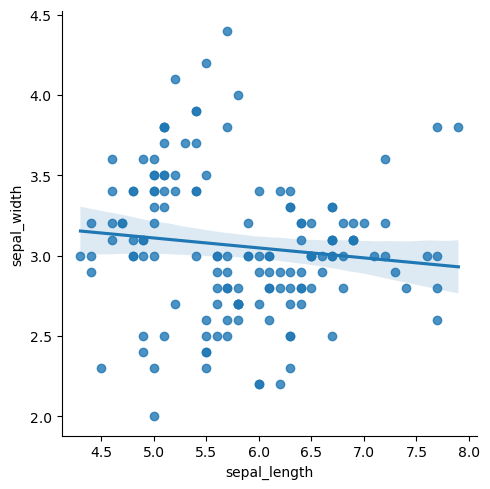

In [429]:
sns.lmplot(x="sepal_length",y="sepal_width",data=data)

In [430]:
x=data.drop(columns=["species"])
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [431]:
y=data.iloc[:,-1]
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [432]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [433]:
data.duplicated().sum()

1

In [434]:
data.drop_duplicates(inplace=True)

In [435]:
data.shape

(149, 5)

In [436]:
data.duplicated().sum()

0

In [437]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data["species"]=le.fit_transform(data["species"])

In [438]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


/Users/sharafunneesapp/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


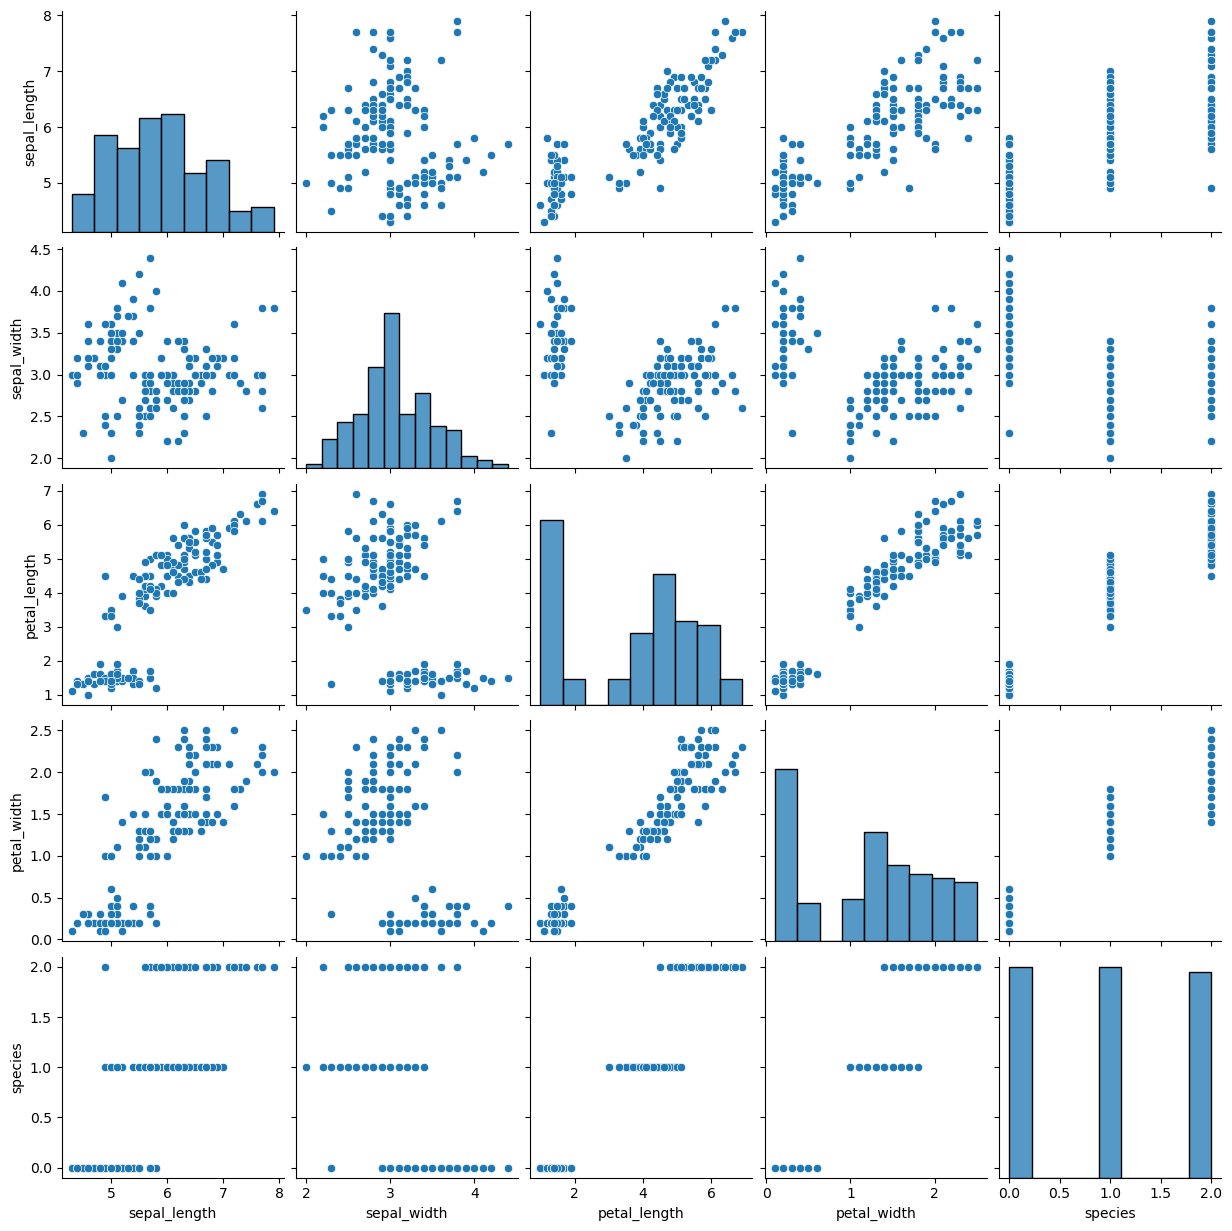

In [439]:
sns.pairplot(data)

In [440]:
threshold=3
outliers=data[(np.abs(stats.zscore(data["sepal_length"]))>threshold)]
data.drop(outliers.index)

outliers=data[(np.abs(stats.zscore(data["sepal_width"]))>threshold)]
data.drop(outliers.index)

outliers=data[(np.abs(stats.zscore(data["petal_length"]))>threshold)]
data.drop(outliers.index)

outliers=data[(np.abs(stats.zscore(data["petal_width"]))>threshold)]
data.drop(outliers.index)

outliers=data[(np.abs(stats.zscore(data["species"]))>threshold)]
data.drop(outliers.index)

data.shape

(149, 5)

In [441]:
x=data.drop(columns=["species"])

In [442]:
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [443]:
y=data["species"]
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 149, dtype: int64

In [444]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

In [445]:
from sklearn.preprocessing import StandardScaler

In [446]:
sc=StandardScaler()
xtrain=sc.fit_transform(xtrain)
xtest=sc.transform(xtest)

In [447]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(xtrain,ytrain)
y_predict=lg.predict(xtest)

In [448]:
y_predict

array([2, 1, 1, 2, 1, 2, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2,
       0, 2, 2, 0, 1, 0, 1, 2])

In [449]:
from sklearn.metrics import classification_report
classification_report(ytest,y_predict)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        10\n           1       0.92      0.92      0.92        13\n           2       0.86      0.86      0.86         7\n\n    accuracy                           0.93        30\n   macro avg       0.93      0.93      0.93        30\nweighted avg       0.93      0.93      0.93        30\n'

In [450]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest,y_predict)

array([[10,  0,  0],
       [ 0, 12,  1],
       [ 0,  1,  6]])

In [451]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,y_predict)


0.9333333333333333

<Axes: >

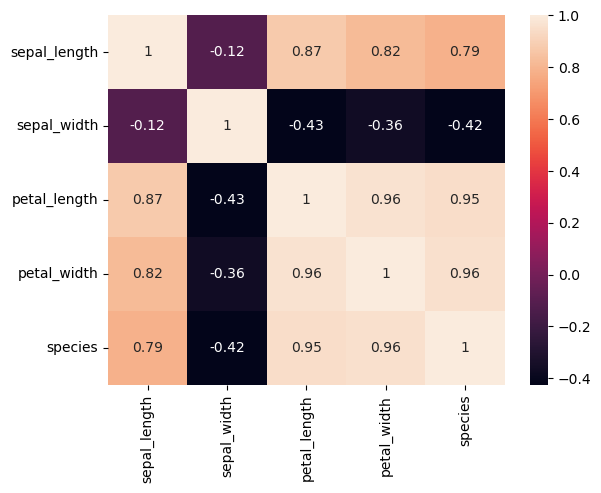

In [452]:
sns.heatmap(data.corr(),annot=True)